# Elementary greenhouse models

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook) by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

____________
<a id='section1'></a>

## 1. A single layer atmosphere
____________

We will make our first attempt at quantifying the greenhouse effect in the simplest possible greenhouse model: a single layer of atmosphere that is able to absorb and emit longwave radiation.

![One layer atmosphere sketch](./figs/1layerAtm_sketch.png)

### Assumptions

- Atmosphere is a single layer of air at temperature $T_a$
- Atmosphere is **completely transparent to shortwave** solar radiation.
- The **surface** absorbs shortwave radiation $(1-\alpha) Q$
- Atmosphere is **completely opaque to infrared** radiation
- Both surface and atmosphere emit radiation as **blackbodies** ($\sigma T_s^4, \sigma T_a^4$)
- Atmosphere radiates **equally up and down** ($\sigma T_a^4$)
- There are no other heat transfer mechanisms

We can now use the concept of energy balance to ask what the temperature need to be in order to balance the energy budgets at the surface and the atmosphere, i.e. the **radiative equilibrium temperatures**.

### Energy balance at the surface

$$
\begin{align*}
\text{energy in} &= \text{energy out} \\
(1-\alpha) Q + \sigma T_a^4 &= \sigma T_s^4 \\
\end{align*}
$$

The presence of the atmosphere above means there is an additional source term: downwelling infrared radiation from the atmosphere.

We call this the **back radiation**.

### Energy balance for the atmosphere

$$
\begin{align}
\text{energy in} &= \text{energy out} \\
\sigma T_s^4 &= A\uparrow + A\downarrow = 2 \sigma T_a^4 \\
\end{align}
$$

which means that 
$$ T_s = 2^\frac{1}{4} T_a \approx 1.2 T_a $$

So we have just determined that, in order to have a purely **radiative equilibrium**, we must have $T_s > T_a$. 

*The surface must be warmer than the atmosphere.*

### Solve for the radiative equilibrium surface temperature

Now plug this into the surface equation to find

$$ \frac{1}{2} \sigma T_s^4 = (1-\alpha) Q  $$

and use the definition of the emission temperature $T_e$ to write

$$ (1-\alpha) Q = \sigma T_e^4 $$

*In fact, in this model, $T_e$ is identical to the atmospheric temperature $T_a$, since all the OLR originates from this layer.*

Solve for the surface temperature:

$$ T_s = 2^\frac{1}{4} T_e $$

From the observed outgoing longwave radiation that we studied last week, $T_e = 255$ K. Thus you can solve for the surface temperature...

In [3]:
def surface(Te = 255):
    Ts = 2**(1/4)*Te
    return Ts

surface()

303.24781432569387

This model is one small step closer to reality: surface is warmer than atmosphere, emissions to space generated in the atmosphere, atmosphere heated from below and helping to keep surface warm.

### Why does this model overpredict the surface temperature

Our model now overpredicts the surface temperature by about 15ºC (303 K versus the observed 288 K).

Why is this?  Let's discuss.

- Te is not the same as Ta. 
- The atmosphere is not actually completely opaque to infrared radiation
- The atmosphere has a vertical structure

____________
<a id='section2'></a>

## 2. Introducing the two-layer grey gas model
____________

Let's generalize the above model just a little bit to build a slighly more realistic model of longwave radiative transfer.

We will address two shortcomings of our single-layer model:
1. No vertical structure
2. 100% longwave opacity

Relaxing these two assumptions gives us what turns out to be a very useful prototype model for **understanding how the greenhouse effect works**.

### Assumptions

- The atmosphere is **transparent to shortwave radiation** (still)
- Divide the atmosphere up into **two layers of equal mass** (the dividing line is thus at 500 hPa pressure level)
- Each layer **absorbs only a fraction $\epsilon$** of whatever longwave radiation is incident upon it.
- We will call the fraction $\epsilon$ the **absorptivity** of the layer.
- Assume $\epsilon$ is the same in each layer

This is called the **grey gas** model, where **grey** here means the emission and absorption have **no spectral dependence** (same at every wavelength).

We can think of this model informally as a "leaky greenhouse".

Note that the assumption that $\epsilon$ is the same in each layer is appropriate if the absorption is actually carried out by a gas that is **well-mixed** in the atmosphere.

Out of our two most important absorbers:

- CO$_2$ is well mixed
- H$_2$O is not (mostly confined to lower troposphere due to strong temperature dependence of the saturation vapor pressure).

But we will ignore this aspect of reality for now.

### Kirchoff's Law

In order to build our model, we need to introduce one additional piece of physics known as **Kirchoff's Law**:

$$ \text{absorptivity} = \text{emissivity} $$

So **if a layer of atmosphere at temperature $T$ absorbs a fraction $\epsilon$** of incident longwave radiation, it must **emit**

$$ \epsilon ~\sigma ~T^4 $$

both up and down.

### A sketch of the radiative fluxes in the 2-layer atmosphere

![Two layer atmosphere sketch](./figs/2layerAtm_sketch.png)

- Surface temperature is $T_s$
- Atm. temperatures are $T_0, T_1$ where $T_0$ is closest to the surface.
- absorptivity of atm layers is $\epsilon$
- Surface emission is $\sigma T_s^4$
- Atm emission is $\epsilon \sigma T_0^4, \epsilon \sigma T_1^4$ (up and down)
- Absorptivity = emissivity for atmospheric layers
- a fraction $(1-\epsilon)$ of the longwave beam is **transmitted** through each layer

____________
## 3. Tracing the upwelling beam of longwave radiation
____________

Let's think about the upwelling beam of longwave radiation, which we denote $U$.

### Surface to layer 0

We start at the surface. The upward flux **from the surface to layer 0** is 

$$U_0 = \sigma T_s^4$$

(just the emission from the suface).

### Layer 0 to layer 1

Now **following this beam upward**, we first recognize that a fraction $\epsilon$ of this beam is **absorbed** in layer 0. 

The upward flux from layer 0 to layer 1 consists of the sum of two parts:

1. The **transmitted part** of whatever is incident from below (i.e. the part that is **not absorbed**)
2. **New upward emissions** from layer 0

We can write this upward flux from layer 0 to layer 1 as:

$$U_1 = (1-\epsilon) \sigma T_s^4 + \epsilon \sigma T_0^4$$

### Beyond layer 1

Continuing to follow the same beam, we follow the same logic! A fraction $\epsilon$ of $U_1$ is absorbed in layer 1, and therefore the transmitted part is $(1-\epsilon) U_1$.

Including new emissions from layer 1, the upwelling flux above layer 1 is

$$U_2 = (1-\epsilon) U_1 + \epsilon \sigma T_1^4$$

### Outgoing Longwave Radiation

Since there is **no more atmosphere above layer 1**, this upwelling beam is our OLR for this model:

$$\text{OLR} = U_2 = (1-\epsilon) U_1 + \epsilon \sigma T_1^4$$

which, plugging in the above expression for $U_1$, works out to

$$\text{OLR} = (1-\epsilon)^2 \sigma T_s^4 + \epsilon(1-\epsilon)\sigma T_0^4 + \epsilon \sigma T_1^4$$

Here the three terms represent **contributions to the total OLR** that **originate from each of the three levels**

### Limits of large and small absorptivity/emissivity

Think about the following two questions:

- What happens to this expression if $\epsilon=1$? *What does this represent physically?*
- What about $\epsilon=0$?

By allowing the atmosphere to partially absorb emissions from other levels, we now see that the Outgoing Longwave Radiation to space **includes emissions from every level** - and therefore **affected by temperature at every level**!

____________

## 4. Tuning the grey gas model to observations
____________

In building our new model we have introduced exactly **one parameter**, the absorptivity $\epsilon$. We need to choose a value for $\epsilon$.

We will tune our model so that it **reproduces the observed global mean OLR** given **observed global mean temperatures**.

### Global mean air temperature observations

To get appropriate temperatures for $T_s, T_0, T_1$, let's revisit the global, annual mean lapse rate plot from NCEP Reanalysis data we first encountered in the [Radiation notes](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/radiation.html).

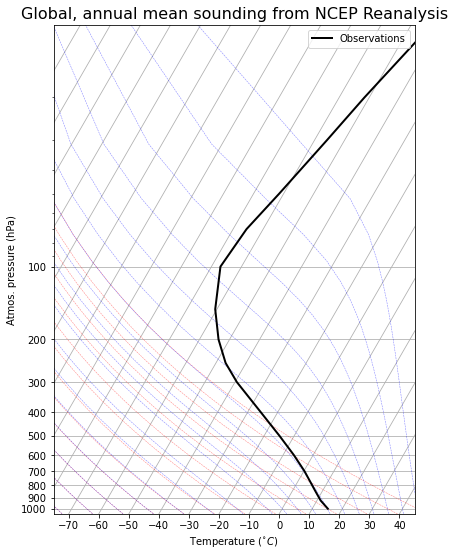

In [5]:
#  This code is used just to create the skew-T plot of global, annual mean air temperature
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from metpy.plots import SkewT
ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
ncep_air = xr.open_dataset( ncep_url + "pressure/air.mon.1981-2010.ltm.nc", use_cftime=True)
#  Take global, annual average and convert to Kelvin
coslat = np.cos(np.deg2rad(ncep_air.lat))
weight = coslat / coslat.mean(dim='lat')
Tglobal = (ncep_air.air * weight).mean(dim=('lat','lon','time'))
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)
skew.plot(Tglobal.level, Tglobal, color='black', linestyle='-', linewidth=2, label='Observations')
skew.ax.set_ylim(1050, 10)
skew.ax.set_xlim(-75, 45)
# Add the relevant special lines
skew.plot_dry_adiabats(linewidth=0.5)
skew.plot_moist_adiabats(linewidth=0.5)
#skew.plot_mixing_lines()
skew.ax.legend()
skew.ax.set_xlabel(r'Temperature ($^{\circ} C$)')
skew.ax.set_ylabel('Atmos. pressure (hPa)')
skew.ax.set_title('Global, annual mean sounding from NCEP Reanalysis', fontsize = 16);

### Target temperatures for our model tuning

First, we set 
$$T_s = 288 \text{ K}  $$

From the lapse rate plot, an average temperature for the layer between 1000 and 500 hPa is 

$$ T_0 = 275 \text{ K}$$

Defining an average temperature for the layer between 500 and 0 hPa is more ambiguous because of the lapse rate reversal at the tropopause. We will choose

$$ T_1 = 230 \text{ K}$$

From the graph, this is approximately the observed global mean temperature at 275 hPa or about 10 km.

### OLR

From the observed global energy budget (see previous weeks) we set 

$$\text{OLR} = 238.5 \text{ W m}^{-2}$$

### Solving for $\epsilon$

We wrote down the expression for OLR as a function of temperatures and absorptivity in our model above. 

All we need to do is plug the observed values into the above expression for OLR, and solve for $\epsilon$.

It is a **quadratic equation** for the unknown $\epsilon$. We could work out the exact solution using the quadratic formula.

But let's do it **graphically**, using Python!

### Exercise: graphical solution to find the best fit value of $\epsilon$

The OLR formula for the leaky greenhouse that we derived above is

$$\text{OLR} = (1-\epsilon)^2 \sigma T_s^4 + \epsilon(1-\epsilon)\sigma T_0^4 + \epsilon \sigma T_1^4$$

Do the following:

- Write a Python function that implements this formula
- The function should accept **four input parameters**:
    - The three temperatures $T_s, T_0, T_1$
    - The emissivity $\epsilon$
- Using this function, make a **graph of OLR vs. $\epsilon$** for the observed temperature values $T_s = 288, T_0 = 275, T_1 = 230$
- For the graph, $\epsilon$ should range between 0 and 1.
- From your graph, find the approximate value of $\epsilon$ that gives $OLR = 238.5$

In [6]:
sigma=5.67E-8
def OLR(Ts, T0, T1, epsilon):
    fromsurf = ((1-epsilon)**2)*sigma*(Ts**4)
    fromL0 = epsilon*(1-epsilon)*sigma*(T0**4)
    fromL1 = epsilon*sigma*(T1**4)
    return fromsurf+fromL0+fromL1

In [7]:
eps = np.linspace(0,1,num=20)
olrtests = OLR(Ts=288, T0=275, T1=230, epsilon=eps)

[Text(0.5, 0, '$\\epsilon$'), Text(0, 0.5, 'OLR [W/m2]')]

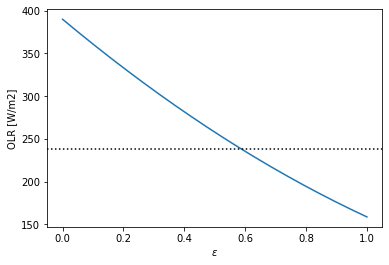

In [9]:
fig, ax=plt.subplots()
ax.plot(eps, olrtests)
ax.axhline(238.5, color='k', ls=':')
ax.set(xlabel=r'$\epsilon$', ylabel='OLR [W/m2]')

Note if you solve the quadratic equation algebraically you will get two solutions: 

- $\epsilon \approx 0.586$ 
- $\epsilon \approx 3.93$

(for details, see [the advanced notes here](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/sympy-greenhouse.html))

**Why is the second solution not physically meaningful?**

Hopefully your graph shows that $\epsilon = 0.586$ gives the correct value of OLR. 

This is the absorptivity that guarantees that **our model reproduces the observed OLR given the observed temperatures**.

____________

## 5. Level of emission
____________

### Contributions from each level to the outgoing radiation

Now that we have tuned up our model, we can see exactly how strongly each level contributes to the OLR. 

The three components of the OLR are

$$
\begin{align*}
\text{OLR}_s &= (1-\epsilon)^2 \sigma T_s^4  \\
\text{OLR}_0 &= \epsilon(1-\epsilon)\sigma T_0^4 \\
\text{OLR}_1 &= \epsilon \sigma T_1^4 
\end{align*}
$$

which of course add up to the total OLR we wrote down above.

### Exercise: calculate contributions to OLR

**Write some simple Python code to calculate each term in the OLR using the observed temperatures and the tuned value $\epsilon = 0.586$. Fill out the list below using your calculated numbers.** 

In [12]:
def OLR(e=0.586, sigma=5.67E-8, Ts=288, T0=275, T1=230):
    OLRs = ((1-e)**2)*sigma*Ts**4
    OLR0 = e*(1-e)*sigma*T0**4
    OLR1 = e*sigma*T1**4
    return OLRs, OLR0, OLR1

OLR()

(66.85804791878124, 78.67047843703125, 92.980530342)

**Contributions to the OLR originating from each level, in W/m2:**

- Surface: 66.86
- Level 0: 78.67
- Level 1: 92.98

In [15]:
Temp=sum(OLR())
print(Temp)

238.50905669781247


Notice that the largest single contribution is coming from the top layer. 

*This is in spite of the fact that the emissions from this layer are weak, because it is so cold.*

###  Changing the level of emission by adding absorbers

Adding some **extra greenhouse absorbers** will mean that a **greater fraction** of incident longwave radiation is **absorbed in each layer**.

Thus **$\epsilon$ must increase** as we add greenhouse gases.

Suppose we have $\epsilon$ initially, and the absorptivity increases to $\epsilon_2 = \epsilon + \Delta \epsilon$.

Suppose further that this increase happens **abruptly** so that there is no time for the temperatures to respond to this change. **We hold the temperatures fixed** in the column and ask how the radiative fluxes change.

**Question: Do you expect the OLR to increase or decrease?**

### Calculating the change in level of emission

Let's use our two-layer leaky greenhouse model to investigate the answer.

The components of the OLR before the perturbation are

$$
\begin{align*}
\text{OLR}_s &= (1-\epsilon)^2 \sigma T_s^4  \\
\text{OLR}_0 &= \epsilon(1-\epsilon)\sigma T_0^4 \\
\text{OLR}_1 &= \epsilon \sigma T_1^4 
\end{align*}
$$

and after the perturbation we have

$$
\begin{align*}
\text{OLR}_s &= (1-\epsilon - \Delta \epsilon)^2 \sigma T_s^4  \\
\text{OLR}_0 &= (\epsilon + \Delta \epsilon)(1-\epsilon - \Delta \epsilon)\sigma T_0^4 \\
\text{OLR}_1 &= (\epsilon + \Delta \epsilon) \sigma T_1^4 
\end{align*}
$$

Let's subtract off the original components to get the contributions to the **change in OLR** from each layer:

$$
\begin{align*}
\Delta \text{OLR}_s &= \left[(1-\epsilon - \Delta \epsilon)^2 - (1-\epsilon)^2\right]\sigma T_s^4  \\
\Delta \text{OLR}_0 &= \left[(\epsilon + \Delta \epsilon)(1-\epsilon - \Delta \epsilon) - \epsilon(1-\epsilon)  \right] \sigma T_0^4 \\
\Delta \text{OLR}_1 &= \left[(\epsilon + \Delta \epsilon) - \epsilon \right] \sigma T_1^4 
\end{align*}
$$

Now expand this out, but to make things easier to deal with, neglect term in $\Delta \epsilon^2$ (very small - we will be considering changes of less than 10% in $\epsilon$):

$$
\begin{align*}
\Delta \text{OLR}_s &\approx (\Delta \epsilon) \left[ -2(1-\epsilon) \right] \sigma T_s^4  \\
\Delta \text{OLR}_0 &\approx (\Delta \epsilon) (1 - 2 \epsilon) \sigma T_0^4 \\
\Delta \text{OLR}_1 &\approx (\Delta \epsilon) \sigma T_1^4 
\end{align*}
$$

Now look at the **sign** of each term. Recall that $0 < \epsilon < 1$. **Which terms in the OLR go up and which go down?**

**THIS IS VERY IMPORTANT, SO STOP AND THINK ABOUT IT.**

The contribution from the **surface** must **decrease**, while the contribution from the **top layer** must **increase**.

**When we add absorbers, the average level of emission goes up!**

____________

## 6. Radiative forcing in the 2-layer grey gas model
____________

### Definition of Radiative Forcing

We now define a very important quantity:

**"Radiative forcing" is the change in total radiative flux at TOA after adding absorbers**

In this model, **only the longwave flux can change**, so we calculate the radiative forcing as

$$ R = - \Delta \text{OLR} $$

(with the minus sign so that $R$ is **positive when the climate system is gaining extra energy**).

### Connection between radiative forcing and level of emission

We just worked out that whenever we **add some extra absorbers**, the **emissions to space** (on average) will originate from **higher levels** in the atmosphere. 

What does this mean for OLR? Will it increase or decrease?

To get the answer, we just have to sum up the three contributions we wrote above:

$$
\begin{align*}
R &= -\Delta \text{OLR}_s - \Delta \text{OLR}_0 - \Delta \text{OLR}_1  \\
  &= -\Delta \epsilon \left[  -2(1-\epsilon) \sigma T_s^4 + (1 - 2 \epsilon) \sigma T_0^4  + \sigma T_1^4 \right]
\end{align*}
$$

Is this a positive or negative number? The key point is this:

**It depends on the temperatures, i.e. on the lapse rate.**

### Greenhouse effect for an isothermal atmosphere

Stop and think about this question:

If the **surface and atmosphere are all at the same temperature**, does the OLR go up or down when $\epsilon$ increases (i.e. we add more absorbers)?

Understanding this question is key to understanding how the greenhouse effect works.

#### Let's solve the isothermal case

We will just set $T_s = T_0 = T_1$ in the above expression for the radiative forcing.

What do you get?

In [22]:
R = 0

#### The answer is $R=0$ 

For an isothermal atmosphere, there is **no change** in OLR when we add extra greenhouse absorbers. Hence, no radiative forcing and no greenhouse effect.

Why?

The level of emission still must go up. But since the temperature at the upper level is the **same** as everywhere else, the emissions are exactly the same.

### The radiative forcing (change in OLR) depends on the lapse rate!

For a more realistic example of radiative forcing due to an increase in greenhouse absorbers, we use our observed temperatures and the tuned value for $\epsilon$. 

We'll express the answer in W m$^{-2}$ for a 2% increase in $\epsilon$:

$$ \Delta \epsilon = 0.02 \times 0.58 $$

In [16]:
epsilon = 0.586041150248834
delta_epsilon = 0.02 * epsilon
delta_epsilon

0.011720823004976679

Calculate the three components of the radiative forcing:

In [29]:
sigma = 5.67E-8
Ts = 288.
T0 = 275.
T1 = 230.

In [30]:
#  Component originating from the surface
Rs = -delta_epsilon * (-2*(1-epsilon)*sigma * Ts**4)
Rs

3.78528239476332

In [31]:
#  Component originating from level 0
R0 = -delta_epsilon * (1-2*epsilon) * sigma * (T0**4)
print(R0)

0.6540457761108388


In [32]:
#  Component originating from level 1
R1 = -delta_epsilon * sigma*T1**4
print(R1)

-1.8597411929137297


So just add them up to get the total radiative forcing:

In [33]:
R = Rs + R0 + R1 
R

2.579586977960429

So in our example, **the OLR decreases by 2.6 W m$^{-2}$**, or equivalently, the **radiative forcing is +2.6 W m$^{-2}$.**

What we have just calculated is this:

**Given the observed lapse rates, a small increase in absorbers will cause a small decrease in OLR.**

The **greenhouse effect** thus gets **stronger**, and energy will begin to accumulate in the system -- which will eventually **cause temperatures to increase** as the system adjusts to a new equilibrium.

____________

## 7. Summary
____________

### Key physical lessons

- Putting a **layer of longwave absorbers** above the surface keeps the **surface substantially warmer**, because of the **backradiation** from the atmosphere (greenhouse effect).
- The **grey gas** model assumes that each layer absorbs and emits a fraction $\epsilon$ of its blackbody value, independent of wavelength.

- With **incomplete absorption** ($\epsilon < 1$), there are contributions to the OLR from every level and the surface (there is no single **level of radiative emission**)
- Adding more absorbers means that **contributions to the OLR** from **upper levels** go **up**, while contributions from the surface go **down**.

- The **radiative forcing** caused by an increase in absorbers **depends on the lapse rate** (decrease in temperature with altitude in the atmosphere).
- For an **isothermal atmosphere** the radiative forcing is zero and there is **no greenhouse effect**
- The radiative forcing is positive for our atmosphere **because tropospheric temperatures tend to decrease with height**.

____________

## Credits

This notebook is based on a chapter of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It is licensed for free and open consumption under the
[Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________